#**Getting data**

In [1]:
import torch
from torch import nn
import requests
import zipfile
from pathlib import Path

In [2]:
if  zipfile.is_zipfile(Path("pizza_stesk_sushi.zip")):
  print("data already exists skipping download")
else:
  print("downloading pizza_steak_sushi.zip")
  request= requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
  with open("pizza_steak_sushi.zip", "wb") as f:
    f.write(request.content)
  zip_ref=zipfile.ZipFile("pizza_steak_sushi.zip")
  zip_ref.extractall()
  zip_ref.close()

downloading pizza_steak_sushi.zip


In [3]:
import os
os.listdir("train")
for dirpath, dir_name, filename in os.walk("train"):
  print(dirpath, dir_name, len(filename))

train ['sushi', 'steak', 'pizza'] 0
train/sushi [] 72
train/steak [] 75
train/pizza [] 78


In [4]:
import os

print("in Train\n")
for dir_path, dir_name, file_name in os.walk("train"):
  print(f"there are {len(dir_name)} directories | {len(file_name)} images | in {dir_path}")

print("\nin Test\n")
for dir_path, dir_name, file_name in os.walk("test"):
  print(f"there are {len(dir_name)} directories | {len(file_name)} images | in {dir_path}")

in Train

there are 3 directories | 0 images | in train
there are 0 directories | 72 images | in train/sushi
there are 0 directories | 75 images | in train/steak
there are 0 directories | 78 images | in train/pizza

in Test

there are 3 directories | 0 images | in test
there are 0 directories | 31 images | in test/sushi
there are 0 directories | 19 images | in test/steak
there are 0 directories | 25 images | in test/pizza


#**Visualizing data**

In [5]:
"train/"+str(os.listdir("train/steak"))

"train/['3577618.jpg', '1225762.jpg', '1976160.jpg', '231296.jpg', '2979061.jpg', '1839481.jpg', '2614189.jpg', '2087958.jpg', '2629750.jpg', '1736968.jpg', '339891.jpg', '2606444.jpg', '443210.jpg', '3727036.jpg', '100135.jpg', '239025.jpg', '1257104.jpg', '1598345.jpg', '1624747.jpg', '560503.jpg', '2561199.jpg', '2129685.jpg', '167069.jpg', '256592.jpg', '461689.jpg', '922752.jpg', '355715.jpg', '421476.jpg', '735441.jpg', '2254705.jpg', '3142045.jpg', '937133.jpg', '2707522.jpg', '2222018.jpg', '1966300.jpg', '1621763.jpg', '1264154.jpg', '1961025.jpg', '97656.jpg', '2013535.jpg', '3245622.jpg', '1787505.jpg', '225990.jpg', '3857508.jpg', '830007.jpg', '1849463.jpg', '3518960.jpg', '2603058.jpg', '165639.jpg', '2614649.jpg', '2017387.jpg', '1647351.jpg', '914570.jpg', '482022.jpg', '2878151.jpg', '3074367.jpg', '3142674.jpg', '75537.jpg', '1382427.jpg', '3727491.jpg', '2324994.jpg', '214320.jpg', '2287136.jpg', '2648423.jpg', '1761285.jpg', '234626.jpg', '2825100.jpg', '1937872.jpg

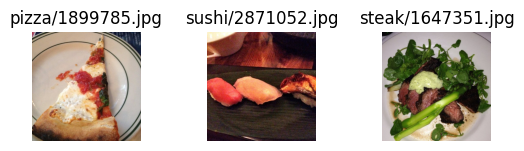

In [6]:
import random
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

dir=[]
j=1
for i in range(3):
  dir.append(random.choice(os.listdir("train")))

for i in dir:

  rand_img=random.choice(os.listdir("train/"+i))
  rand_path="train/"+i+"/"+str(rand_img )
  x= i+"/"+rand_img
  img= Image.open(rand_path)
  img_plt=np.array(img) 
  plt.subplot(3,3, j)
  plt.imshow(img) #img_plt can also be used
  plt.axis("off")
  plt.title(f"{x}")
  j+=1

#**Preprocessing the data**

In [7]:
import torchvision
from torchvision import transforms

In [8]:
transformer=transforms.Compose([transforms.Resize((64, 64)),
                                transforms.ToTensor()])

In [9]:
transformer(img)

tensor([[[0.0275, 0.0275, 0.0353,  ..., 0.5373, 0.5294, 0.5137],
         [0.0353, 0.0392, 0.0588,  ..., 0.5765, 0.5608, 0.5529],
         [0.3059, 0.3216, 0.3333,  ..., 0.5922, 0.5882, 0.5804],
         ...,
         [0.8000, 0.8000, 0.8078,  ..., 0.7686, 0.7608, 0.7569],
         [0.8000, 0.8000, 0.8039,  ..., 0.7686, 0.7608, 0.7569],
         [0.8039, 0.8078, 0.8039,  ..., 0.7647, 0.7569, 0.7529]],

        [[0.0275, 0.0275, 0.0667,  ..., 0.4941, 0.4863, 0.4706],
         [0.0353, 0.0353, 0.0588,  ..., 0.5255, 0.5137, 0.5059],
         [0.2863, 0.3059, 0.3176,  ..., 0.5451, 0.5373, 0.5294],
         ...,
         [0.7608, 0.7647, 0.7725,  ..., 0.7255, 0.7137, 0.7098],
         [0.7608, 0.7647, 0.7686,  ..., 0.7216, 0.7137, 0.7098],
         [0.7569, 0.7647, 0.7686,  ..., 0.7176, 0.7098, 0.7059]],

        [[0.0353, 0.0353, 0.0314,  ..., 0.5255, 0.5176, 0.5020],
         [0.0431, 0.0471, 0.0627,  ..., 0.5608, 0.5490, 0.5412],
         [0.3216, 0.3412, 0.3569,  ..., 0.5804, 0.5725, 0.

In [10]:
transformer(img).permute(1,2,0) # C*H*W -> H*W*C

tensor([[[0.0275, 0.0275, 0.0353],
         [0.0275, 0.0275, 0.0353],
         [0.0353, 0.0667, 0.0314],
         ...,
         [0.5373, 0.4941, 0.5255],
         [0.5294, 0.4863, 0.5176],
         [0.5137, 0.4706, 0.5020]],

        [[0.0353, 0.0353, 0.0431],
         [0.0392, 0.0353, 0.0471],
         [0.0588, 0.0588, 0.0627],
         ...,
         [0.5765, 0.5255, 0.5608],
         [0.5608, 0.5137, 0.5490],
         [0.5529, 0.5059, 0.5412]],

        [[0.3059, 0.2863, 0.3216],
         [0.3216, 0.3059, 0.3412],
         [0.3333, 0.3176, 0.3569],
         ...,
         [0.5922, 0.5451, 0.5804],
         [0.5882, 0.5373, 0.5725],
         [0.5804, 0.5294, 0.5647]],

        ...,

        [[0.8000, 0.7608, 0.7647],
         [0.8000, 0.7647, 0.7686],
         [0.8078, 0.7725, 0.7765],
         ...,
         [0.7686, 0.7255, 0.7255],
         [0.7608, 0.7137, 0.7137],
         [0.7569, 0.7098, 0.7098]],

        [[0.8000, 0.7608, 0.7647],
         [0.8000, 0.7647, 0.7686],
         [0.

In [11]:
def transformed_image_plotter(transformer=transformer):

  for i in dir:

    rand_img=random.choice(os.listdir("train/"+i))
    rand_path="train/"+i+"/"+str(rand_img )
  img_path= "train/"+i+"/"+rand_img


  img=Image.open(img_path)
  plt.subplot(1,2,1)
  plt.imshow(img)
  plt.axis("off")
  plt.title(f"original\nshape{img.size}")


  img_t=transformer(img)
  transformer(img).permute(1,2,0) # C*H*W -> H*W*C
  img_t=img_t.permute(1,2,0) 
  plt.subplot(1,2,2)
  plt.imshow(img_t)
  plt.axis("off")
  plt.title(f"transformed\nshape{img_t.shape}")

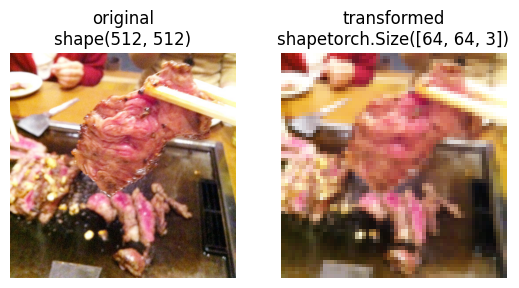

In [12]:
transformed_image_plotter()

#**Loading Image from Directory**

##**Dataset**

In [13]:
train_dataset=torchvision.datasets.ImageFolder("train",
                                               transform=transformer,
                                               target_transform=None)

test_dataset=torchvision.datasets.ImageFolder("test",
                                               transform=transformer,
                                               target_transform=None)

In [14]:
train_dataset, test_dataset

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                ToTensor()
            ))

In [15]:
class_names=train_dataset.classes
class_to_idx=train_dataset.class_to_idx
class_names, class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [16]:
img, label=train_dataset[1]
img.shape, label

(torch.Size([3, 64, 64]), 0)

In [17]:
train_dataset.samples[1]

('train/pizza/1033251.jpg', 0)

In [18]:
train_dataset[3][0].shape, type(train_dataset[3][0]), train_dataset[3][0].dtype

(torch.Size([3, 64, 64]), torch.Tensor, torch.float32)

##**DataLoader**

In [19]:
train_dataloader=torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=os.cpu_count())
test_dataloader=torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=os.cpu_count())
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7f9660a2a980>,
 <torch.utils.data.dataloader.DataLoader at 0x7f9660a2a290>)

In [20]:
imgs, labels=next(iter(train_dataloader))
imgs.shape, labels

(torch.Size([32, 3, 64, 64]),
 tensor([1, 1, 2, 1, 1, 0, 1, 2, 1, 2, 0, 0, 1, 2, 1, 1, 0, 2, 0, 2, 1, 2, 2, 1,
         1, 0, 2, 2, 1, 2, 1, 1]))

##**Custom Dataset and Loader**

In [21]:
def find_classes(dir):
  classes=os.listdir(dir)
  classes.sort()
  class_to_idx={key : values for values, key in enumerate(classes)}
  
  return classes, class_to_idx

In [22]:
find_classes("train")

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [23]:
import pathlib

class ImageFolderCustom(torch.utils.data.Dataset):
  def __init__(self, dir, transform=None):

    self.paths=list(pathlib.Path(dir).glob("*/*jpg"))
    self.transform=transform
    self.classes, self.class_to_idx= find_classes(dir)

  def load_image (self, index):

    img_path=self.paths[index]
    return Image.open(img_path)
  
  def __len__(self):
    return len(self.paths)

  def __getitem__(self, index):

    img=self.load_image (index)
    img_class=self.paths[index].parent.name
    class_idx=self.class_to_idx[img_class]

    if self.transform:
      return self.transform(img), class_idx
    else:
      return img, class_idx


In [24]:
train_dataset_c= ImageFolderCustom("train", transformer)
test_dataset_c= ImageFolderCustom("test", transformer)
train_dataset_c.classes, train_dataset_c.class_to_idx, len(train_dataset_c), train_dataset_c[0][0].shape

(['pizza', 'steak', 'sushi'],
 {'pizza': 0, 'steak': 1, 'sushi': 2},
 225,
 torch.Size([3, 64, 64]))

In [25]:
train_dataloader= torch.utils.data.DataLoader(train_dataset_c, batch_size=32, shuffle=True, num_workers=os.cpu_count())
test_dataloader=torch.utils.data.DataLoader(test_dataset_c, batch_size=32, shuffle=False, num_workers=os.cpu_count())

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7f9660c05a50>,
 <torch.utils.data.dataloader.DataLoader at 0x7f9660c050c0>)

#**Model_0:**TinyVGG

In [26]:
from torch import nn

model_0= nn.Sequential(nn.Conv2d(in_channels=3, out_channels=16, kernel_size=5),
                       nn.ReLU(),
                       nn.Conv2d(16,64,5),
                       nn.ReLU(),
                       nn.MaxPool2d(kernel_size=3),
                       nn.Conv2d(in_channels=64, out_channels=16, kernel_size=3),
                       nn.ReLU(),
                       nn.MaxPool2d(kernel_size=3),
                       nn.Flatten(),
                       nn.Linear(in_features=400, out_features=len(class_names)), #the in_features can be found by using dummy data
                       nn.Softmax())

model_0

Sequential(
  (0): Conv2d(3, 16, kernel_size=(5, 5), stride=(1, 1))
  (1): ReLU()
  (2): Conv2d(16, 64, kernel_size=(5, 5), stride=(1, 1))
  (3): ReLU()
  (4): MaxPool2d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 16, kernel_size=(3, 3), stride=(1, 1))
  (6): ReLU()
  (7): MaxPool2d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=False)
  (8): Flatten(start_dim=1, end_dim=-1)
  (9): Linear(in_features=400, out_features=3, bias=True)
  (10): Softmax(dim=None)
)

In [27]:
imgs.shape

torch.Size([32, 3, 64, 64])

In [28]:
model_0(imgs).shape

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/container.py:217: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


torch.Size([32, 3])

##**Torchinfo**

In [29]:
try: 
  import torchinfo
except:
  !pip install torchinfo
  import torchinfo;
  from torchinfo import summary

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [30]:
summary(model_0, input_size=(1,3,64,64))

Layer (type:depth-idx)                   Output Shape              Param #
Sequential                               [1, 3]                    --
├─Conv2d: 1-1                            [1, 16, 60, 60]           1,216
├─ReLU: 1-2                              [1, 16, 60, 60]           --
├─Conv2d: 1-3                            [1, 64, 56, 56]           25,664
├─ReLU: 1-4                              [1, 64, 56, 56]           --
├─MaxPool2d: 1-5                         [1, 64, 18, 18]           --
├─Conv2d: 1-6                            [1, 16, 16, 16]           9,232
├─ReLU: 1-7                              [1, 16, 16, 16]           --
├─MaxPool2d: 1-8                         [1, 16, 5, 5]             --
├─Flatten: 1-9                           [1, 400]                  --
├─Linear: 1-10                           [1, 3]                    1,203
├─Softmax: 1-11                          [1, 3]                    --
Total params: 37,315
Trainable params: 37,315
Non-trainable params: 0
To

##**Train_step and Test_step functtions** 

In [31]:
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
  print("already exists, skipping download!")
else:
  print("downloading helper functions.py")
  file_r= requests.get("https://raw.githubusercontent.com/Jothish2283/DeepLearning-Torch/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(file_r.content)

downloading helper functions.py


In [32]:
from helper_functions import accuracy_fn as acc_fn

###**Train_step fn**

In [33]:
def train_step(model, dataloader, loss_fn, optimizer):

  model.train()
  acc, loss, train_loss, train_acc, epoch_loss, epoch_acc=0,0,0,0,0,0

  for x,y in dataloader:
    y_ps=model(x)
    y_p=y_ps.argmax(dim=1)

    loss=loss_fn(y_ps, y)
    train_loss+=loss.item()

    acc=acc_fn(y_p, y)
    train_acc+=acc

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

  epoch_loss=train_loss/len(dataloader)
  epoch_acc=train_acc/(len(dataloader)*100)

  return epoch_loss, epoch_acc

###**Test_step fn**

In [34]:
def test_step(model, dataloader, loss_fn):

  model.eval()
  acc, loss, val_loss, val_acc, epoch_loss, epoch_acc=0,0,0,0,0,0

  with torch.inference_mode():
    for x,y in dataloader:

      y_ps=model(x)
      y_p=y_ps.argmax(dim=1)
      loss=loss_fn(y_ps, y)
      acc=acc_fn(y_p, y)

      val_loss+=loss.item()
      val_acc+=acc

    epoch_loss=val_loss/len(dataloader)
    epoch_acc=val_acc/(len(dataloader)*100)

  return epoch_loss, epoch_acc

In [35]:
from tqdm.auto import tqdm

def train(model, train_dataloader, test_dataloader, epochs, loss_fn, optimizer):
  train_loss, train_acc, val_loss, val_acc=[],[],[],[]

  for epoch in tqdm(range(epochs)):
    
    l_t,a_t=train_step(model, train_dataloader, loss_fn, optimizer)
    train_loss.append(l_t)
    train_acc.append(a_t)

    l,a= test_step(model, test_dataloader, loss_fn)
    val_loss.append(l)
    val_acc.append(a)

    if (epoch+1)/5>0:
      print(f"Epoch:{epoch+1}")
      print(f"Train|| Loss:{l_t :.3f} Acc:{a_t :.3f}")
      print(f"Test|| Loss:{l :.3f} Acc:{a :.3f}\n")

  results={"train_loss":train_loss, "train_acc":train_acc, "val_loss":val_loss, "val_acc":val_acc}
  
  return results

In [36]:
import time
loss_fn=torch.nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model_0.parameters())

start_t=time.time()
model_0_result=train(model_0, train_dataloader, test_dataloader, 10, loss_fn, optimizer)
end_t=time.time()
total_t=(end_t-start_t)/60
print(f"\nTotal time taken:{total_t :.2f} mins")

  0%|          | 0/10 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/container.py:217: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Epoch:1
Train|| Loss:1.097 Acc:0.445
Test|| Loss:1.095 Acc:0.410

Epoch:2
Train|| Loss:1.088 Acc:0.465
Test|| Loss:1.076 Acc:0.479

Epoch:3
Train|| Loss:1.095 Acc:0.305
Test|| Loss:1.073 Acc:0.469

Epoch:4
Train|| Loss:1.091 Acc:0.371
Test|| Loss:1.082 Acc:0.365

Epoch:5
Train|| Loss:1.058 Acc:0.504
Test|| Loss:1.055 Acc:0.479

Epoch:6
Train|| Loss:1.044 Acc:0.512
Test|| Loss:1.088 Acc:0.402

Epoch:7
Train|| Loss:1.007 Acc:0.570
Test|| Loss:1.125 Acc:0.300

Epoch:8
Train|| Loss:0.959 Acc:0.570
Test|| Loss:1.027 Acc:0.502

Epoch:9
Train|| Loss:0.937 Acc:0.629
Test|| Loss:1.094 Acc:0.372

Epoch:10
Train|| Loss:0.966 Acc:0.543
Test|| Loss:1.042 Acc:0.444


Total time taken:1.09 mins


##**Plot Loss Curve**

In [37]:
import pandas as pd

model_0_df=pd.DataFrame(model_0_result)
model_0_df.head(2)

,train_loss,train_acc,val_loss,val_acc
0,1.096806,0.445312,1.095415,0.410038
1,1.088094,0.464844,1.075816,0.479167


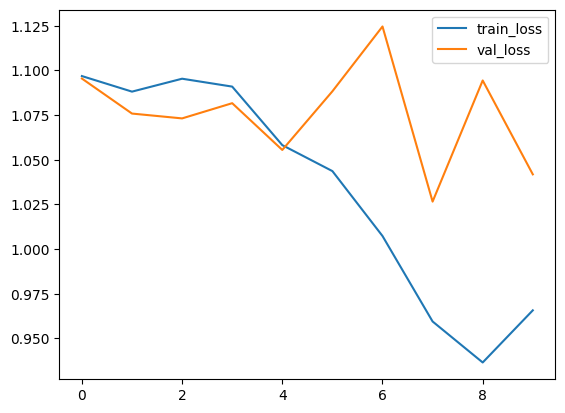

In [38]:
model_0_df[["train_loss", "val_loss"]].plot();

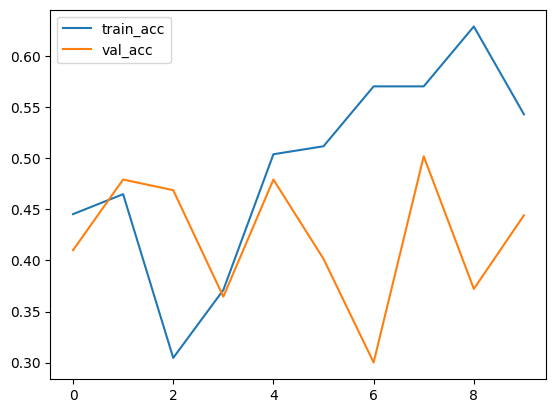

In [39]:
model_0_df[["train_acc","val_acc"]].plot();

##**Model_1:** same as model_0 but with an augmentation transformer

In [40]:
transformer_aug= transforms.Compose([transforms.Resize((64, 64)),
                                    transforms.TrivialAugmentWide(31),
                                    transforms.ToTensor()])
 
train_dataset_a= torchvision.datasets.ImageFolder("train",
                                                  transform=transformer_aug)

train_dataloader_a= torch.utils.data.DataLoader(train_dataset_a, 32, shuffle=True, num_workers=os.cpu_count())
train_dataset_a, train_dataloader_a

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                TrivialAugmentWide(num_magnitude_bins=31, interpolation=InterpolationMode.NEAREST, fill=None)
                ToTensor()
            ),
 <torch.utils.data.dataloader.DataLoader at 0x7f965035cee0>)

In [41]:
imgs, labels=next(iter(train_dataloader_a))
imgs.shape

torch.Size([32, 3, 64, 64])

In [42]:
model_1= nn.Sequential(nn.Conv2d(in_channels=3, out_channels=16, kernel_size=5),
                       nn.ReLU(),
                       nn.Conv2d(16,64,5),
                       nn.ReLU(),
                       nn.MaxPool2d(kernel_size=3),
                       nn.Conv2d(in_channels=64, out_channels=16, kernel_size=3),
                       nn.ReLU(),
                       nn.MaxPool2d(kernel_size=3),
                       nn.Flatten(),
                       nn.Linear(in_features=400, out_features=len(class_names)), #the in_features can be found by using dummy data
                       nn.Softmax())

model_1

Sequential(
  (0): Conv2d(3, 16, kernel_size=(5, 5), stride=(1, 1))
  (1): ReLU()
  (2): Conv2d(16, 64, kernel_size=(5, 5), stride=(1, 1))
  (3): ReLU()
  (4): MaxPool2d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 16, kernel_size=(3, 3), stride=(1, 1))
  (6): ReLU()
  (7): MaxPool2d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=False)
  (8): Flatten(start_dim=1, end_dim=-1)
  (9): Linear(in_features=400, out_features=3, bias=True)
  (10): Softmax(dim=None)
)

In [43]:
summary(model_1, (1, 3, 64, 64))

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/container.py:217: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Layer (type:depth-idx)                   Output Shape              Param #
Sequential                               [1, 3]                    --
├─Conv2d: 1-1                            [1, 16, 60, 60]           1,216
├─ReLU: 1-2                              [1, 16, 60, 60]           --
├─Conv2d: 1-3                            [1, 64, 56, 56]           25,664
├─ReLU: 1-4                              [1, 64, 56, 56]           --
├─MaxPool2d: 1-5                         [1, 64, 18, 18]           --
├─Conv2d: 1-6                            [1, 16, 16, 16]           9,232
├─ReLU: 1-7                              [1, 16, 16, 16]           --
├─MaxPool2d: 1-8                         [1, 16, 5, 5]             --
├─Flatten: 1-9                           [1, 400]                  --
├─Linear: 1-10                           [1, 3]                    1,203
├─Softmax: 1-11                          [1, 3]                    --
Total params: 37,315
Trainable params: 37,315
Non-trainable params: 0
To

In [44]:
optimizer=torch.optim.Adam(model_1.parameters())

start_t=time.time()
model_1_result=train(model_1, train_dataloader_a, test_dataloader, 10, loss_fn, optimizer)
end_t=time.time()
total_t=(end_t-start_t)/60
print(f"\nTotal time taken:{total_t :.2f} mins")

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch:1
Train|| Loss:1.098 Acc:0.375
Test|| Loss:1.095 Acc:0.562

Epoch:2
Train|| Loss:1.094 Acc:0.414
Test|| Loss:1.099 Acc:0.269

Epoch:3
Train|| Loss:1.097 Acc:0.289
Test|| Loss:1.095 Acc:0.319

Epoch:4
Train|| Loss:1.102 Acc:0.355
Test|| Loss:1.067 Acc:0.531

Epoch:5
Train|| Loss:1.090 Acc:0.418
Test|| Loss:1.069 Acc:0.553

Epoch:6
Train|| Loss:1.070 Acc:0.410
Test|| Loss:1.037 Acc:0.604

Epoch:7
Train|| Loss:1.062 Acc:0.422
Test|| Loss:1.181 Acc:0.208

Epoch:8
Train|| Loss:1.067 Acc:0.504
Test|| Loss:1.014 Acc:0.532

Epoch:9
Train|| Loss:1.027 Acc:0.539
Test|| Loss:1.029 Acc:0.424

Epoch:10
Train|| Loss:1.057 Acc:0.418
Test|| Loss:1.005 Acc:0.553


Total time taken:1.11 mins


###**Plot Loss Curves**

In [45]:
model_1_df=pd.DataFrame(model_1_result)
model_1_df.head(2)

,train_loss,train_acc,val_loss,val_acc
0,1.098094,0.375000,1.095355,0.562500
1,1.094362,0.414062,1.098677,0.268939


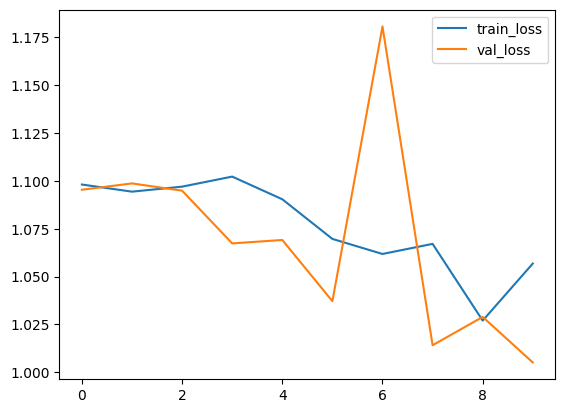

In [46]:
model_1_df[["train_loss", "val_loss"]].plot();

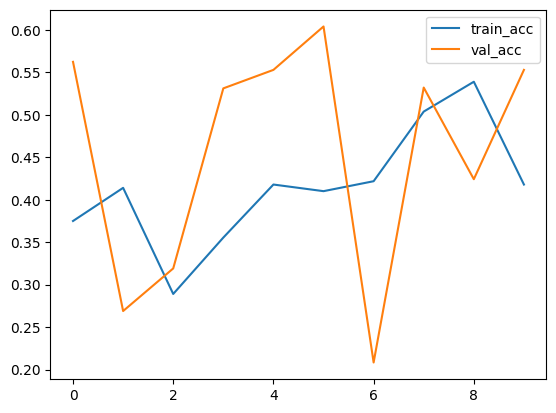

In [47]:
model_1_df[["train_acc","val_acc"]].plot();

#**Testing on custom images**

In [48]:
import requests

request= requests.get("https://www.foodandwine.com/thmb/MT-PmMm_-6BVcPl8tbcnybIf7Vk=/1500x0/filters:no_upscale():max_bytes(150000):strip_icc()/reverse-sear-steak-FT-RECIPE0222-5c6f8d9a037a4ca2b170adea0529ba7a.jpg")
with open("pizza.jpg","wb") as f:
  f.write(request.content)

In [49]:
img=torchvision.io.read_image("pizza.jpg")
img.dtype, img.shape

(torch.uint8, torch.Size([3, 1000, 1500]))

In [50]:
img=img.type(torch.float32)/255.
img.dtype, img.shape

(torch.float32, torch.Size([3, 1000, 1500]))

In [51]:
transformer_c= transforms.Compose([transforms.Resize((64,64))])

img=transformer_c(img)
img.shape

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


torch.Size([3, 64, 64])

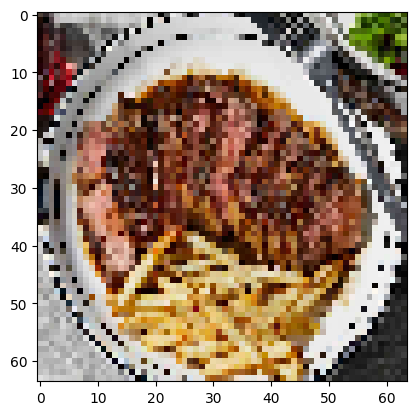

In [52]:
plt.imshow(img.permute(1,2,0));

In [53]:
img=img.unsqueeze(dim=0)
img.shape

torch.Size([1, 3, 64, 64])

In [54]:
model_0(img).argmax(dim=1), model_1(img).argmax(dim=1) 

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/container.py:217: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


(tensor([1]), tensor([1]))

In [55]:
class_to_idx

{'pizza': 0, 'steak': 1, 'sushi': 2}